<span style="font-size: 34px;">PRIORITY NON PREEMPTIVE</span>

In [8]:
import matplotlib.pyplot as plt

In [9]:
processes = [
    {'process_id': 'A', 'arrival_time': 0, 'burst_time': 8, 'priority': 2},
    {'process_id': 'B', 'arrival_time': 3, 'burst_time': 4, 'priority': 1},
    {'process_id': 'C', 'arrival_time': 4, 'burst_time': 5, 'priority': 3},
    {'process_id': 'D', 'arrival_time': 6, 'burst_time': 3, 'priority': 2},
    {'process_id': 'E', 'arrival_time': 10, 'burst_time': 2, 'priority': 1}
]


In [10]:
def priority_non_preemptive_scheduling(processes):

    processes.sort(key=lambda x: (x['priority'], x['arrival_time']))

    current_time = 0
    waiting_time = 0
    turnaround_time = 0

    for process in processes:
        # Check if the process has arrived
        if current_time < process['arrival_time']:
            current_time = process['arrival_time']

        # Calculate waiting time and turnaround time
        process['waiting_time'] = current_time - process['arrival_time']
        waiting_time += process['waiting_time']
        process['turnaround_time'] = process['waiting_time'] + process['burst_time']
        turnaround_time += process['turnaround_time']

        # Update current time
        current_time += process['burst_time']

    # Calculate average waiting time and turnaround time
    avg_waiting_time = waiting_time / len(processes)
    avg_turnaround_time = turnaround_time / len(processes)

    return processes, avg_waiting_time, avg_turnaround_time

<span style="font-size: 34px;">Gantt Chart Prettier</span>

In [11]:
def display_gantt_chart(processes):
    process_ids = [process['process_id'] for process in processes]
    arrival_times = [process['arrival_time'] for process in processes]
    burst_times = [process['burst_time'] for process in processes]
    completion_times = [arrival_time + burst_time for arrival_time, burst_time in zip(arrival_times, burst_times)]

    # to make it colorful
    norm = plt.Normalize(min(completion_times), max(completion_times))
    cmap = plt.cm.get_cmap('summer')  
    colors = [cmap(norm(completion_time)) for completion_time in completion_times]

    plt.figure(figsize=(10, 5))
    plt.barh(process_ids, burst_times, left=arrival_times, color=colors, linewidth=2)  # left is arrival_time, width is burst_time
    plt.xlabel('Time')
    plt.ylabel('Process')
    plt.title('Priority Non-Preemptive Scheduling Gantt Chart')
    plt.grid(True)
    plt.show()

In [12]:
scheduled_processes, avg_waiting_time, avg_turnaround_time = priority_non_preemptive_scheduling(processes)

In [13]:
print("Process ID\tArrival Time\tBurst Time\tPriority\tWaiting Time\tTurnaround Time")
for process in scheduled_processes:
    print(f"{process['process_id']}\t\t{process['arrival_time']}\t\t{process['burst_time']}\t\t{process['priority']}\t\t{process['waiting_time']}\t\t{process['turnaround_time']}")
print(f"Average Waiting Time: {avg_waiting_time:.2f}")
print(f"Average Turnaround Time: {avg_turnaround_time:.2f}")

Process ID	Arrival Time	Burst Time	Priority	Waiting Time	Turnaround Time
B		3		4		1		0		4
E		10		2		1		0		2
A		0		8		2		12		20
D		6		3		2		14		17
C		4		5		3		19		24
Average Waiting Time: 9.00
Average Turnaround Time: 13.40


C:\Users\USER\AppData\Local\Temp\ipykernel_12480\3804269085.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('summer')


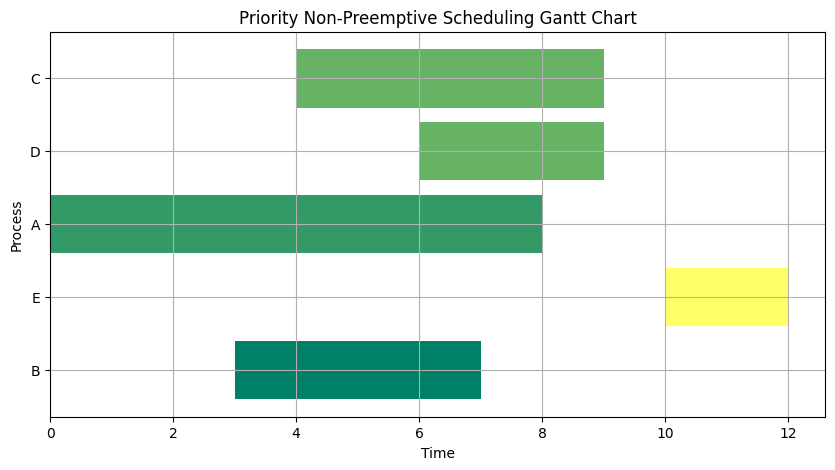

In [14]:
display_gantt_chart(scheduled_processes)